In [1]:
import firebase_admin
from firebase_admin import credentials, firestore
import re
from datetime import datetime
import time
import matplotlib.pyplot as plt
import numpy as np
import os
%matplotlib inline

In [43]:
localdir = 'arduino'
timestamps = []
flist = os.listdir(localdir)
flist

['2018-11-10 14_21_37_602arduino.txt',
 '2018-11-10 14_29_51_848arduino.txt',
 '2018-11-10 14_38_05_125arduino.txt',
 '2018-11-10 14_46_18_130arduino.txt']

In [44]:

for localfile in flist:#0th file in .keep , last file is currently in use
    # print ("Processing file {}".format(localfile))
    f = open(localdir+'/'+localfile,'r')
    # print ("Opened file {}".format(localfile))
    lines=f.read().split('@')[1:]
    f.close()
#     print ( "Read {} lines in {}".format(len(lines),localdir))
    dic = {}
    # if (len(lines)>data_lines_uploaded):
    for line in lines:
        linelist = line.split(',')
        ltime = linelist[0].strip()
#         print("${}$".format(ltime))
        timestamps.append(ltime)
# print("${}$".format(timestamps[0]))
print ("Dictionary made!")

Dictionary made!


In [45]:
# cred = credentials.Certificate("serviceAccountKey.json")
# firebase_admin.initialize_app(cred)
# db = firestore.client()

In [46]:
# database_ref = db.collection(u'sensor_data_mp')
# timestamps = []
# docs = database_ref.get()
# for doc in docs:
#     dic = doc.to_dict()
#     timestamps = timestamps.extend(dic.keys())

In [47]:
len(timestamps)

36457

In [48]:
keys = sorted(timestamps)
diffs = [] 
for i in range(0,len(keys)-1):
    key1 = keys[i]
    key2 = keys[i+1]
#     print("${}$".format(key1))
#         print(key2)
    keyparsed1 = datetime.strptime(key1, "%Y-%m-%d %H:%M:%S:%f")
    keyparsed2 = datetime.strptime(key2, "%Y-%m-%d %H:%M:%S:%f")
#     dif = keyparsed2-keyparsed1
    #print(dif)
    #k = dif.split(':')
    #measure = k[0]*3600+k[1]*60+k[2]
    measure = (keyparsed2-keyparsed1).total_seconds()+(keyparsed2-keyparsed1).microseconds/1000000.0
    diffs.append(measure)
# print("Average : {}".format(np.mean(diffs)))
# print("Std dev : {}".format(np.std(diffs)))
# plt.hist(diffs, normed=True, bins=10,cumulative=False)

# plt.ylabel('Probability');

Average : 1.6226223300970872
Std dev : 0.22621501732748328


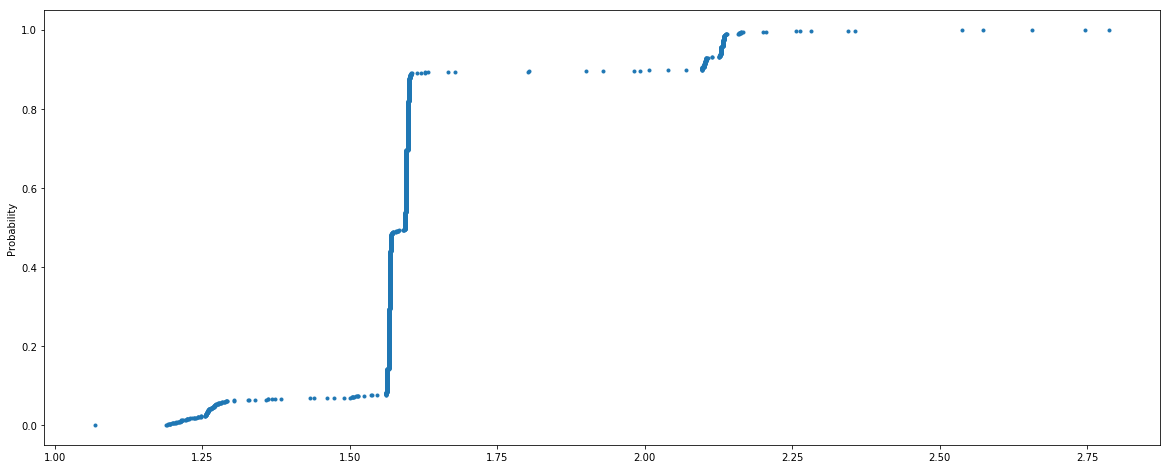

In [30]:
x = sorted(diffs)
x = x[0:-5]
print("Average : {}".format(np.mean(diffs)))
print("Std dev : {}".format(np.std(diffs)))
y = np.arange(1,len(x)+1)/len(x)
plt.figure(figsize=(20,8))
plt.plot(x,y,marker='.',linestyle='none')
plt.ylabel('Probability');

In [51]:
f = open('uptime_with_script_mp.log','r')
lines = f.readlines()
y1 = []
for line in lines:
    y1.append(float(line[45:49]))
x1 = np.arange(1,len(y1)+1)
f.close()

In [52]:
f = open('uptime_noscript.log','r')
lines = f.readlines()
y2 = []
for line in lines:
    y2.append(float(line[45:49]))
x2 = np.arange(1,len(y2)+1)
f.close()

In [53]:
len(x2)

595

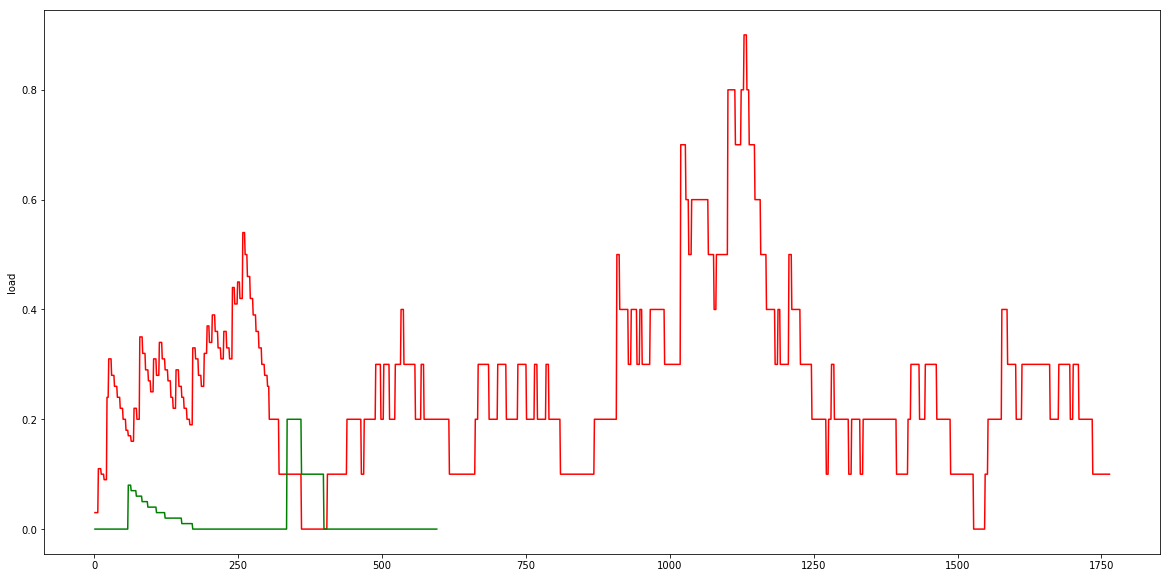

In [54]:
plt.figure(figsize=(20,10))
plt.plot(x1,y1,'r-')
plt.plot(x2,y2,'g-')
plt.ylabel('load')


In [32]:
(1.84-1.5)/1.84

0.18478260869565222

In [37]:
len(keys)

2061

In [50]:
key1 = keys[0]
key2 = keys[36456]
#     print("${}$".format(key1))
#         print(key2)
keyparsed1 = datetime.strptime(key1, "%Y-%m-%d %H:%M:%S:%f")
keyparsed2 = datetime.strptime(key2, "%Y-%m-%d %H:%M:%S:%f")
measure = (keyparsed2-keyparsed1).total_seconds()+(keyparsed2-keyparsed1).microseconds/1000000.0
measure/60

29.96553333333333